**INTRODUCTION**

This dataset contains an airline passenger satisfaction survey. it contains the factors that are highly correlated to a satisfied and Neutral or dissatisfied passengers



**CONTENT**

**Gender**: Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age**: The actual age of the passengers

**Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance**: The flight distance of this journey

**Inflight wifi service** : Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking**: Satisfaction level of online booking

**Food and drink**: Satisfaction level of Food and drink

**Online boarding**: Satisfaction level of online boarding

**Seat comfort**: Satisfaction level of Seat comfort

**On-board service**: Satisfaction level of On-board service

**Baggage handling**: Satisfaction level of baggage handling

**Check-in service**: Satisfaction level of Check-in service

**Inflight service**: Satisfaction level of inflight service

**Cleanliness**: Satisfaction level of Cleanliness

**Departure Delay in Minutes**: Minutes delayed when departure

**Arrival Delay in Minutes**: Minutes delayed when Arrival

**Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

#Analysis and preprocessing

Importing all necessary libraries for analysis and preprocessing

In [236]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [237]:
df=pd.read_csv('/content/drive/MyDrive/datascience1/project/ml project/airline_passenger.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,3,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,5,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,3,4,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,4,2,2,2,4,2,4,0,20.0,satisfied


In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
df.shape

(25976, 21)

In [240]:
df.size

545496

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [242]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,3.215353,3.449222,3.385664,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.331506,1.320090,1.282088,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [243]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [244]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,3,3,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,5,5,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,2,2,4,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,3,4,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,4,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,4,4,3,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,2,2,4,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,4,4,3,5,4,5,4,0,0.0,satisfied


In [245]:
print(df.columns)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Seat comfort', 'On-board service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [246]:
for i in df.columns:
    print(df[i].unique(),i)
    print('_'*30)
    print(df[i].value_counts(),i)
    print('_'*30)

[19556 90035 12360 ... 37675 90086 34799] id
______________________________
id
19556     1
100210    1
50564     1
122974    1
21037     1
         ..
60858     1
44981     1
115289    1
108089    1
34799     1
Name: count, Length: 25976, dtype: int64 id
______________________________
['Female' 'Male'] Gender
______________________________
Gender
Female    13172
Male      12804
Name: count, dtype: int64 Gender
______________________________
['Loyal Customer' 'disloyal Customer'] Customer Type
______________________________
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64 Customer Type
______________________________
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85] Age
______________________________
Age
39    723
25    713
40    635
41    633
43    626
     ... 
75 

Transforming using label encoding and onehot method

In [247]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [248]:
labelfit=le.fit(df['Gender'])
df['Gender']=labelfit.transform(df['Gender'])

In [249]:
labelfit=le.fit(df['Customer Type'])
df['Customer Type']=labelfit.transform(df['Customer Type'])

In [250]:
labelfit=le.fit(df['Type of Travel'])
df['Type of Travel']=labelfit.transform(df['Type of Travel'])

In [251]:
labelfit=le.fit(df['satisfaction'])
df['satisfaction']=labelfit.transform(df['satisfaction'])

In [252]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,52,0,Eco,160,5,4,3,3,3,5,5,2,5,5,50,44.0,1
1,90035,0,0,36,0,Business,2863,1,1,3,5,5,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,Eco,192,2,0,2,2,2,4,3,2,2,2,0,0.0,0
3,77959,1,0,44,0,Business,3377,0,0,0,3,4,1,1,3,1,4,0,6.0,1
4,36875,0,0,49,0,Eco,1182,2,3,4,4,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,Business,526,3,3,3,4,4,3,4,4,5,4,0,0.0,0
25972,71167,1,0,23,0,Business,646,4,4,4,4,4,4,5,5,5,4,0,0.0,1
25973,37675,0,0,17,1,Eco,828,2,5,1,2,2,4,4,5,4,2,0,0.0,0
25974,90086,1,0,14,0,Business,1127,3,3,3,4,4,3,5,4,5,4,0,0.0,1


In [253]:
from sklearn.preprocessing import OneHotEncoder

In [254]:
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(df[['Class']])
print(one_hot_encoded)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [255]:
df1=pd.DataFrame(one_hot_encoded,columns=['Business','Eco','Eco Plus'])
df1.head()

,Business,Eco,Eco Plus
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [256]:
df.drop('Class',inplace=True,axis=1)

In [257]:
df=pd.concat([df,df1],axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,4,3,3,...,5,2,5,5,50,44.0,1,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,1,3,5,...,4,3,4,5,0,0.0,1,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,0,2,2,...,3,2,2,2,0,0.0,0,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,0,3,...,1,3,1,4,0,6.0,1,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,3,4,4,...,2,4,2,4,0,20.0,1,0.0,1.0,0.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  int64  
 2   Customer Type                      25976 non-null  int64  
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  On-board service                   25976 non-null  int

In [259]:
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Food and drink,0


In [260]:
dpl_rows = df.duplicated().any()
dpl_rows

False

In [261]:
df.isna().any()

,0
id,False
Gender,False
Customer Type,False
Age,False
Type of Travel,False
Flight Distance,False
Inflight wifi service,False
Departure/Arrival time convenient,False
Ease of Online booking,False
Food and drink,False


In [262]:
corln = df.corr()['satisfaction']
print(corln)

id                                   0.010965
Gender                               0.007335
Customer Type                       -0.179632
Age                                  0.121697
Type of Travel                      -0.453268
Flight Distance                      0.295292
Inflight wifi service                0.280395
Departure/Arrival time convenient   -0.064798
Ease of Online booking               0.157709
Food and drink                       0.216868
Seat comfort                         0.346275
On-board service                     0.321491
Baggage handling                     0.252415
Checkin service                      0.241495
Inflight service                     0.245573
Cleanliness                          0.314350
Departure Delay in Minutes          -0.051635
Arrival Delay in Minutes            -0.061059
satisfaction                         1.000000
Business                             0.496974
Eco                                 -0.442417
Eco Plus                          

In [263]:
dfd=df.drop(['Departure Delay in Minutes'],axis=1,inplace=True)
dfa=df.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)
dfad=df.drop(['Departure/Arrival time convenient'],axis=1,inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,3,3,3,5,5,2,5,5,1,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,3,5,5,4,4,3,4,5,1,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,2,2,2,4,3,2,2,2,0,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,3,4,1,1,3,1,4,1,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,4,4,2,2,2,4,2,4,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,526,3,3,4,4,3,4,4,5,4,0,1.0,0.0,0.0
25972,71167,1,0,23,0,646,4,4,4,4,4,5,5,5,4,1,1.0,0.0,0.0
25973,37675,0,0,17,1,828,2,1,2,2,4,4,5,4,2,0,0.0,1.0,0.0
25974,90086,1,0,14,0,1127,3,3,4,4,3,5,4,5,4,1,1.0,0.0,0.0


plotting outliers of every column

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


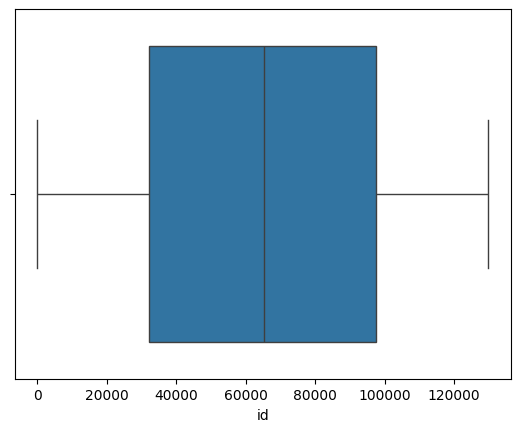

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


id ******************************


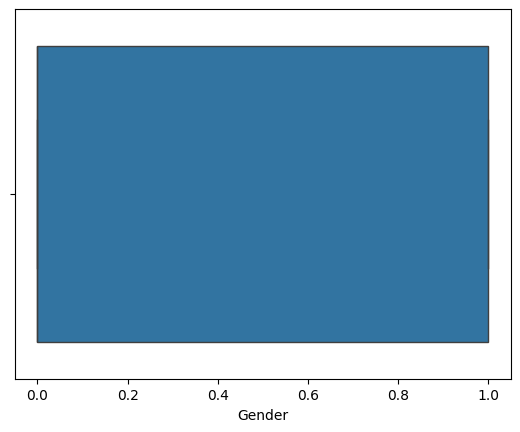

Gender ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


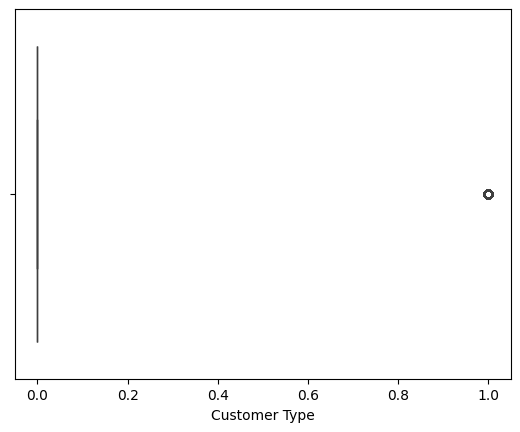

Customer Type ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


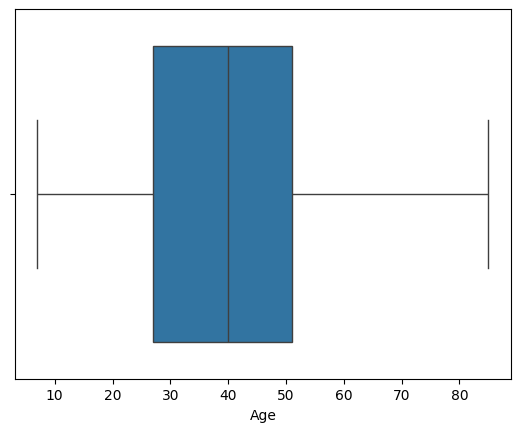

Age ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


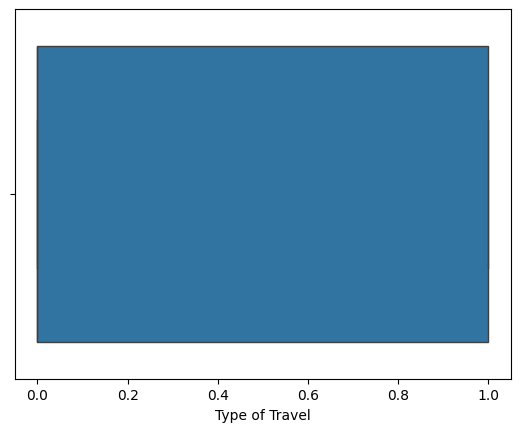

Type of Travel ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


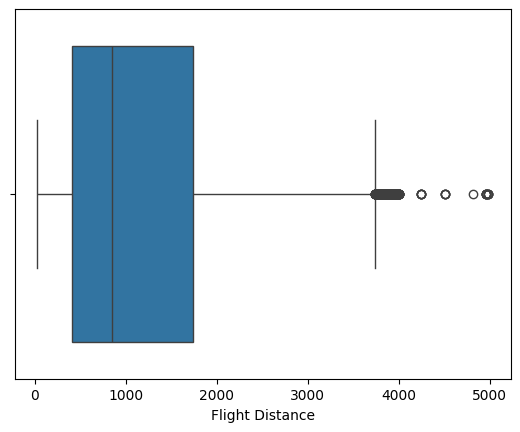

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Flight Distance ******************************


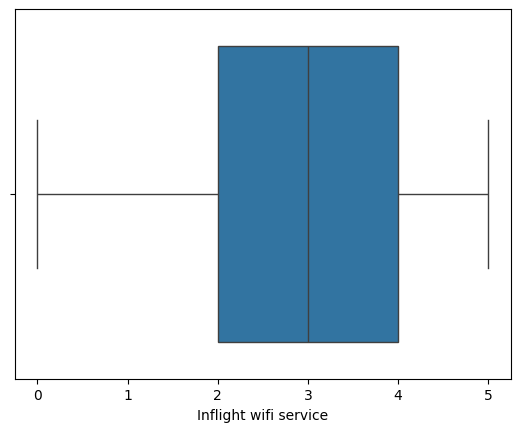

Inflight wifi service ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


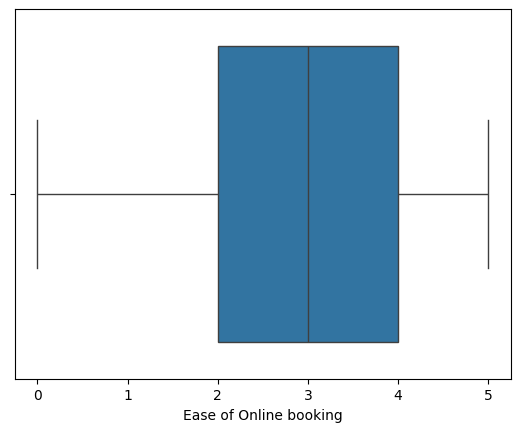

Ease of Online booking ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


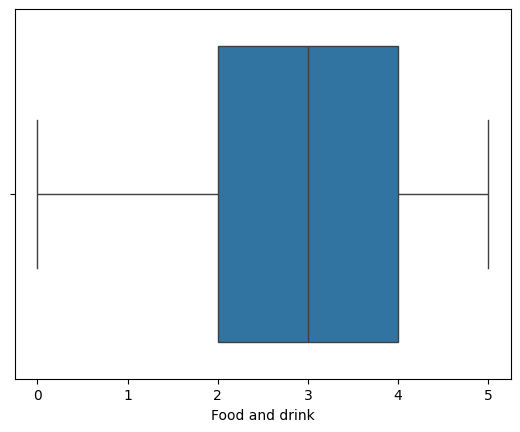

Food and drink ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


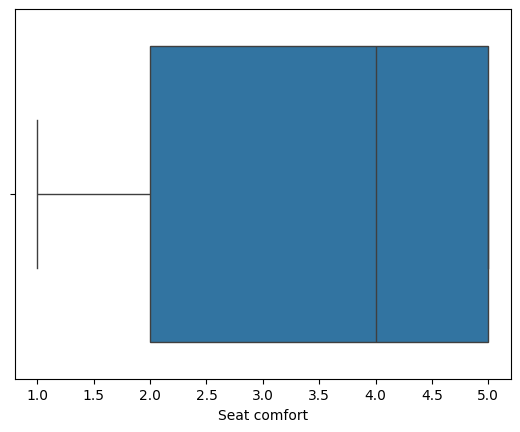

Seat comfort ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


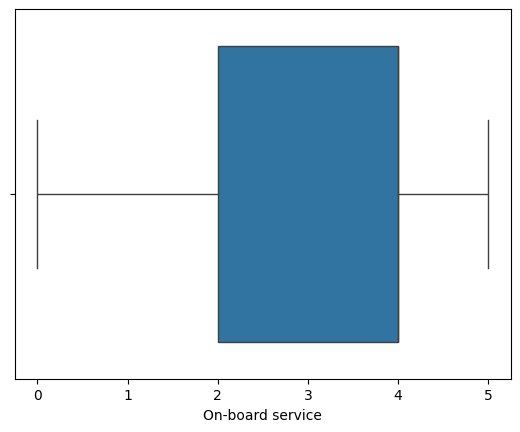

On-board service ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


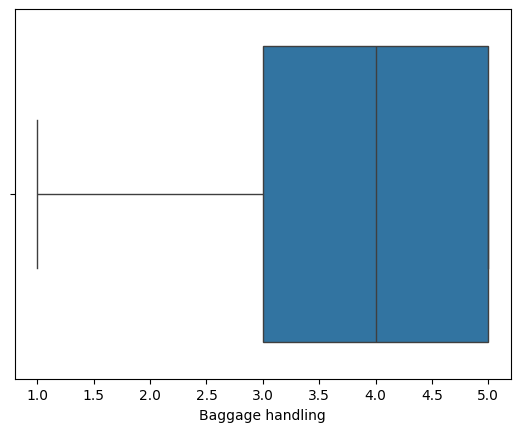

Baggage handling ******************************

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


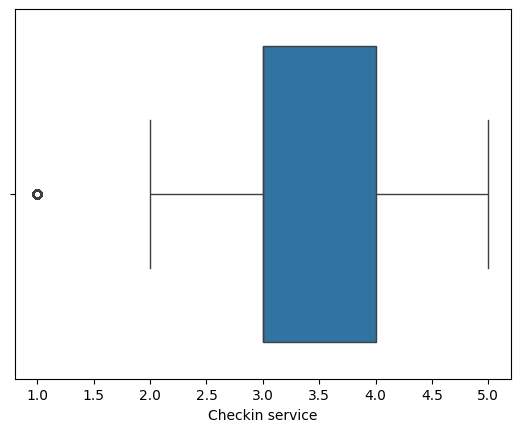

Checkin service ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


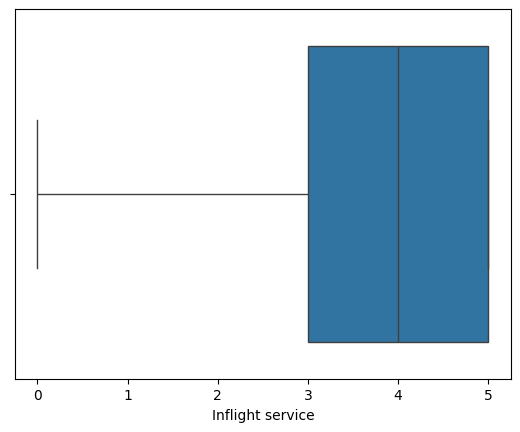

Inflight service ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


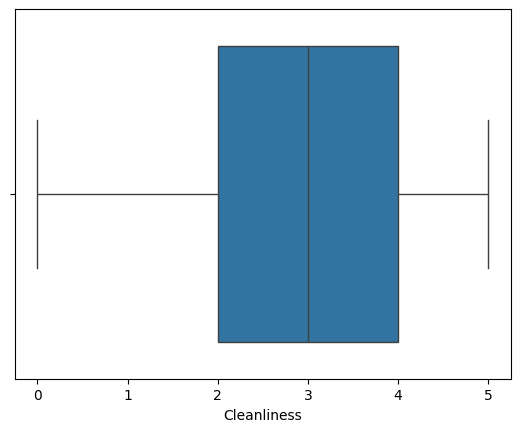

Cleanliness ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


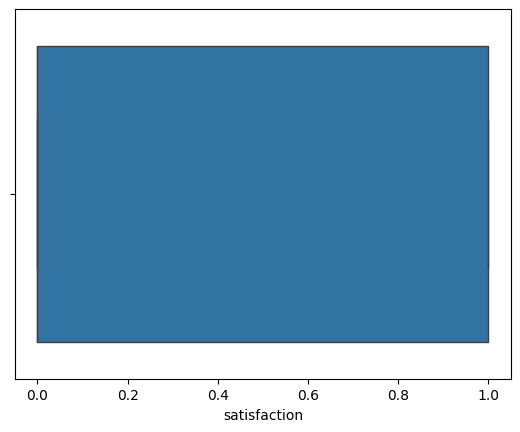

satisfaction ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


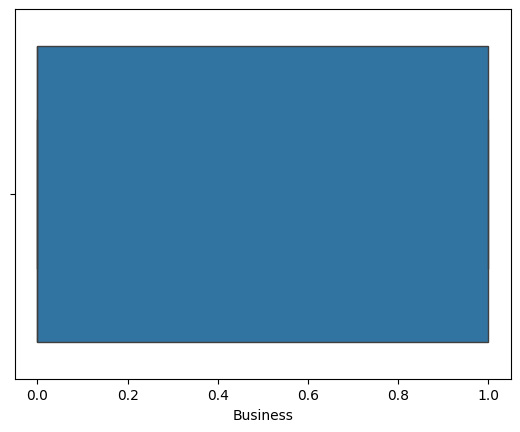

Business ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


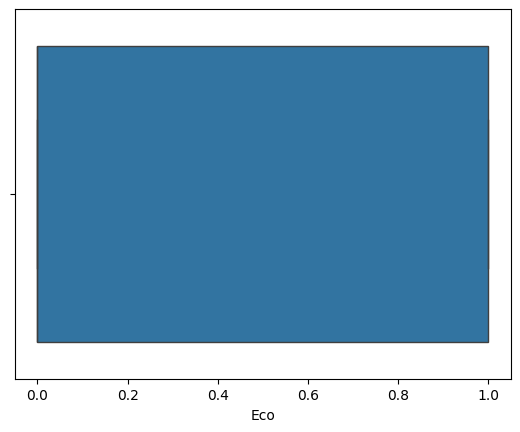

Eco ******************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


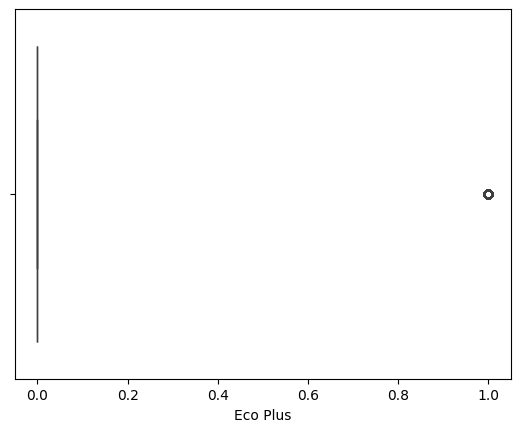

Eco Plus ******************************


In [264]:
for i in df.columns:
  sns.boxplot(x = df[i])
  plt.show()
  print(i,'*'*30)

splitting as input and output,x variable indicates input features and y variable indicates output

In [265]:
x = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [266]:
x.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,3,3,3,5,5,2,5,5,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,3,5,5,4,4,3,4,5,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,2,2,2,4,3,2,2,2,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,3,4,1,1,3,1,4,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,4,4,2,2,2,4,2,4,0.0,1.0,0.0


In [267]:
y.head()

,satisfaction
0,1
1,1
2,0
3,1
4,1


In [268]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,14573
1,11403


splitting x and y for training and testing purpose

In [269]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

Smoting to balance the values of y

In [270]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [271]:
xres,yres=sm.fit_resample(xtrain,ytrain)

In [272]:
yres.value_counts()

,count
satisfaction,
0,11692
1,11692


Standardize to  make model perform better

In [273]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

xtrain=sd.fit_transform(xtrain)

xtest=sd.fit_transform(xtest)

xres=sd.fit_transform(xres)

Implementing different supervised algorithms to this dataset

#1)KNN

In [274]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [275]:
ypred = knn.predict(xtest)

In [276]:
print(ypred)

[1 1 0 ... 0 0 1]


evaluation

In [277]:
#training score

training_score=knn.score(xtrain,ytrain)
training_score

0.9406159769008662

In [278]:
#testing score

testing_score=knn.score(xtest,ytest)
testing_score

0.9143571978444958

In [279]:
from sklearn import metrics

In [280]:
#accuracy score

knn_acc=metrics.accuracy_score(ytest,ypred)
knn_acc

0.9143571978444958

In [281]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred)

array([[2740,  141],
       [ 304, 2011]])

In [282]:
#precision score

metrics.precision_score(ytest,ypred)

0.9344795539033457

In [283]:
#recall score

metrics.recall_score(ytest,ypred)

0.868682505399568

In [284]:
#classification report

print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2881
           1       0.93      0.87      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.92      0.91      0.91      5196



building knn model with the balanced data

In [285]:
from sklearn.neighbors import KNeighborsClassifier

knn1=KNeighborsClassifier()

knn1.fit(xres,yres)

KNeighborsClassifier()

In [286]:
ypred1 = knn1.predict(xtest)

In [287]:
ypred1

array([1, 1, 0, ..., 0, 0, 1])

In [288]:
#training score

training_score=knn1.score(xres,yres)
training_score

0.9413701676359905

In [289]:
#testing score

testing_score=knn1.score(xtest,ytest)
testing_score

0.9147421093148576

In [290]:
#accuracy score

metrics.accuracy_score(ytest,ypred1)

0.9147421093148576

In [291]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred1)

array([[2702,  179],
       [ 264, 2051]])

In [292]:
#precision score

metrics.precision_score(ytest,ypred1)

0.9197309417040359

In [293]:
#recall score

metrics.recall_score(ytest,ypred1)

0.8859611231101512

In [294]:
#classification report

print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2881
           1       0.92      0.89      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy(accuracy score=0.91)

#2)Decision tree

In [295]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

max_depth=4: This parameter limits the maximum depth of the tree to 4 levels. Limiting the depth can help prevent overfitting.

criterion='entropy': This parameter specifies the function to measure the quality of a split. In this case, it uses the entropy (information gain) criterion.

In [296]:
pre=dt.predict(xtest)
pre

array([1, 1, 0, ..., 1, 0, 1])

evaluation

In [297]:
#training score

training_score=dt.score(xtrain,ytrain)
training_score

0.8836381135707411

In [298]:
#testing score

testing_score=dt.score(xtest,ytest)
testing_score

0.8791377983063895

In [299]:
#accuracy score
dt_acc=metrics.accuracy_score(ytest,pre)
dt_acc

0.8791377983063895

In [300]:

#confusion matrix

metrics.confusion_matrix(ytest,pre)

array([[2510,  371],
       [ 257, 2058]])

In [301]:
#precision score

metrics.precision_score(ytest,pre)

0.8472622478386167

In [302]:
#recall score

metrics.recall_score(ytest,pre)

0.8889848812095033

In [303]:
#classification report

print(metrics.classification_report(ytest,pre))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2881
           1       0.85      0.89      0.87      2315

    accuracy                           0.88      5196
   macro avg       0.88      0.88      0.88      5196
weighted avg       0.88      0.88      0.88      5196



plotting decision tree model using this data





[Text(0.5, 0.9, 'x[15] <= 0.042\nentropy = 0.989\nsamples = 20780\nvalue = [11692, 9088]'),
 Text(0.25, 0.7, 'x[6] <= 0.582\nentropy = 0.723\nsamples = 10829\nvalue = [8656, 2173]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[6] <= -1.669\nentropy = 0.28\nsamples = 7930\nvalue = [7546, 384]'),
 Text(0.0625, 0.3, 'x[14] <= -2.106\nentropy = 0.069\nsamples = 244\nvalue = [2, 242]'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 242\nvalue = [0, 242]'),
 Text(0.1875, 0.3, 'x[4] <= 0.417\nentropy = 0.133\nsamples = 7686\nvalue = [7544, 142]'),
 Text(0.15625, 0.1, 'entropy = 0.274\nsamples = 3012\nvalue = [2870, 142]'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 4674\nvalue = [4674, 0]'),
 Text(0.375, 0.5, 'x[6] <= 1.333\nentropy = 0.96\nsamples = 2899\nvalue = [1110, 1789]'),
 Text(0.3125, 0.3, 'x[4] <= 0.417\nentropy = 0.995\nsamples = 2034\nvalue = [1102, 932]'),
 Text(0.28125, 0.1, 'entropy = 0.947\nsamples = 1

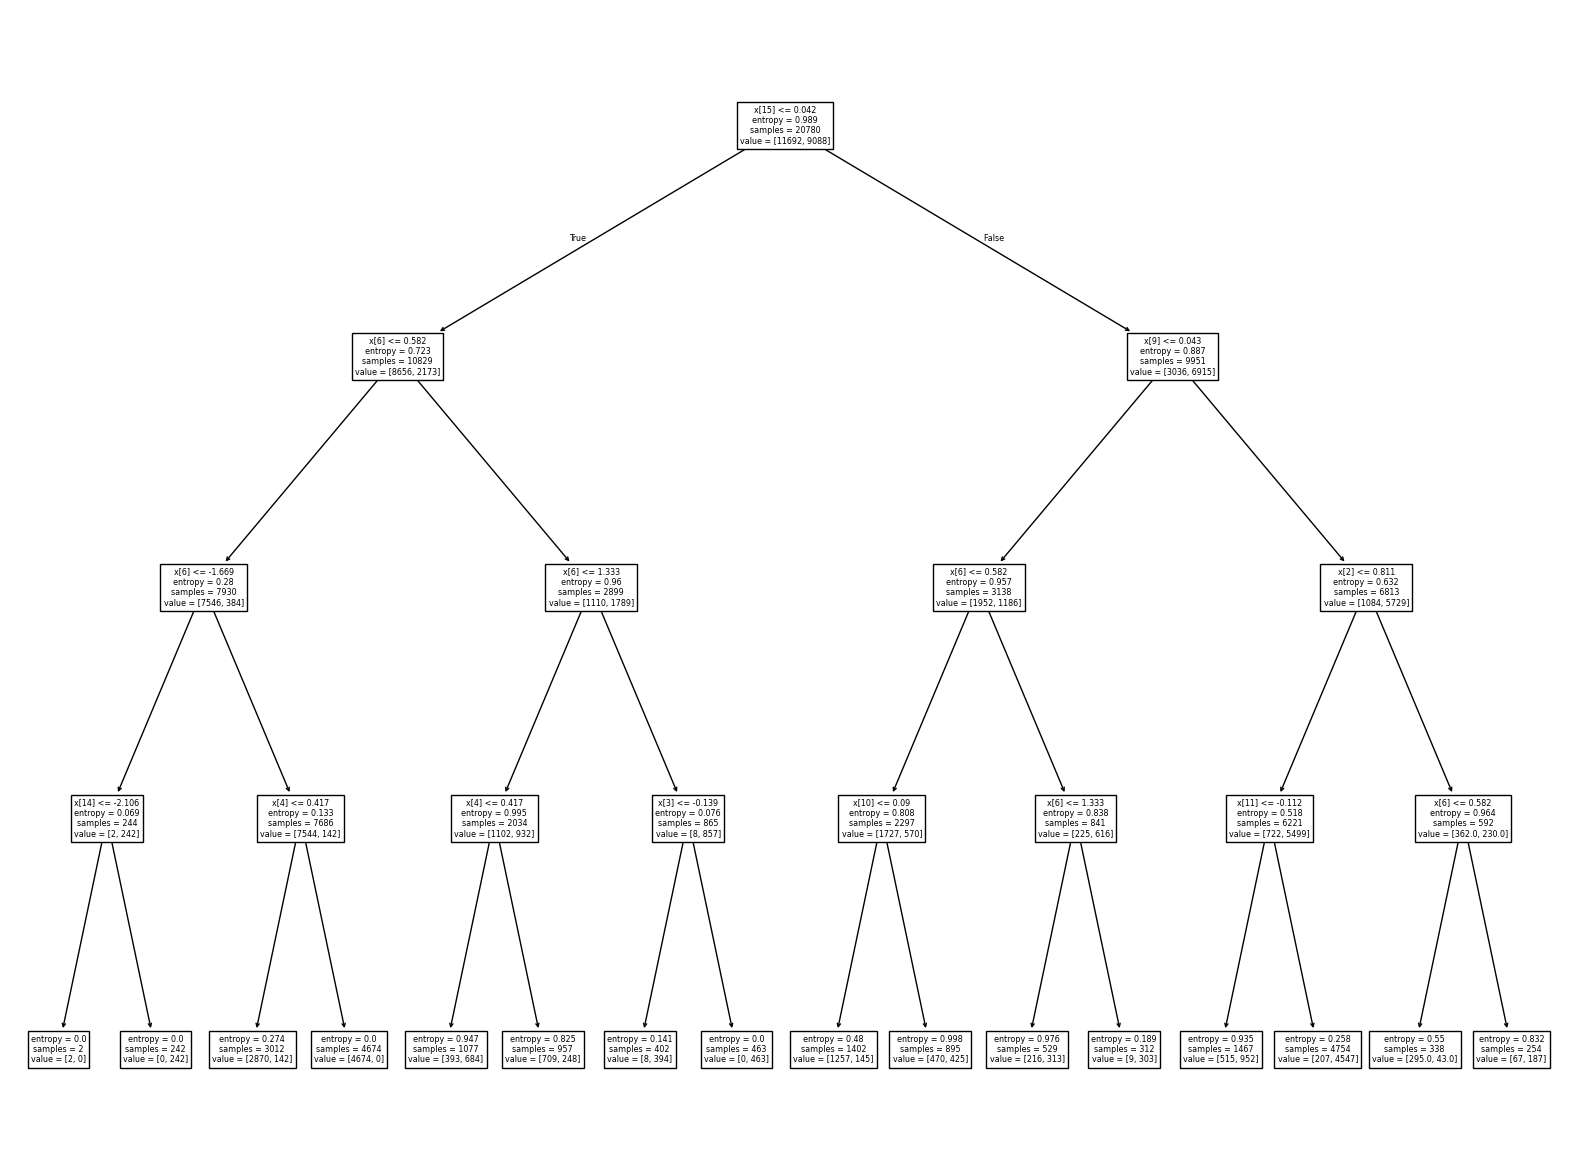

In [304]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25976 non-null  int64  
 1   Gender                  25976 non-null  int64  
 2   Customer Type           25976 non-null  int64  
 3   Age                     25976 non-null  int64  
 4   Type of Travel          25976 non-null  int64  
 5   Flight Distance         25976 non-null  int64  
 6   Inflight wifi service   25976 non-null  int64  
 7   Ease of Online booking  25976 non-null  int64  
 8   Food and drink          25976 non-null  int64  
 9   Seat comfort            25976 non-null  int64  
 10  On-board service        25976 non-null  int64  
 11  Baggage handling        25976 non-null  int64  
 12  Checkin service         25976 non-null  int64  
 13  Inflight service        25976 non-null  int64  
 14  Cleanliness             25976 non-null

[Text(0.5, 0.9, 'satisfaction <= 0.042\nentropy = 0.989\nsamples = 20780\nvalue = [11692, 9088]\nclass = 1'),
 Text(0.25, 0.7, 'Inflight wifi service <= 0.582\nentropy = 0.723\nsamples = 10829\nvalue = [8656, 2173]\nclass = 1'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Inflight wifi service <= -1.669\nentropy = 0.28\nsamples = 7930\nvalue = [7546, 384]\nclass = 1'),
 Text(0.0625, 0.3, 'Cleanliness <= -2.106\nentropy = 0.069\nsamples = 244\nvalue = [2, 242]\nclass = 0'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 242\nvalue = [0, 242]\nclass = 0'),
 Text(0.1875, 0.3, ' Type of Travel <= 0.417\nentropy = 0.133\nsamples = 7686\nvalue = [7544, 142]\nclass = 1'),
 Text(0.15625, 0.1, 'entropy = 0.274\nsamples = 3012\nvalue = [2870, 142]\nclass = 1'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 4674\nvalue = [4674, 0]\nclass = 1'),
 Text(0.375, 0.5, 'Inflight wifi service <= 1.333\nentropy = 0.96\nsample

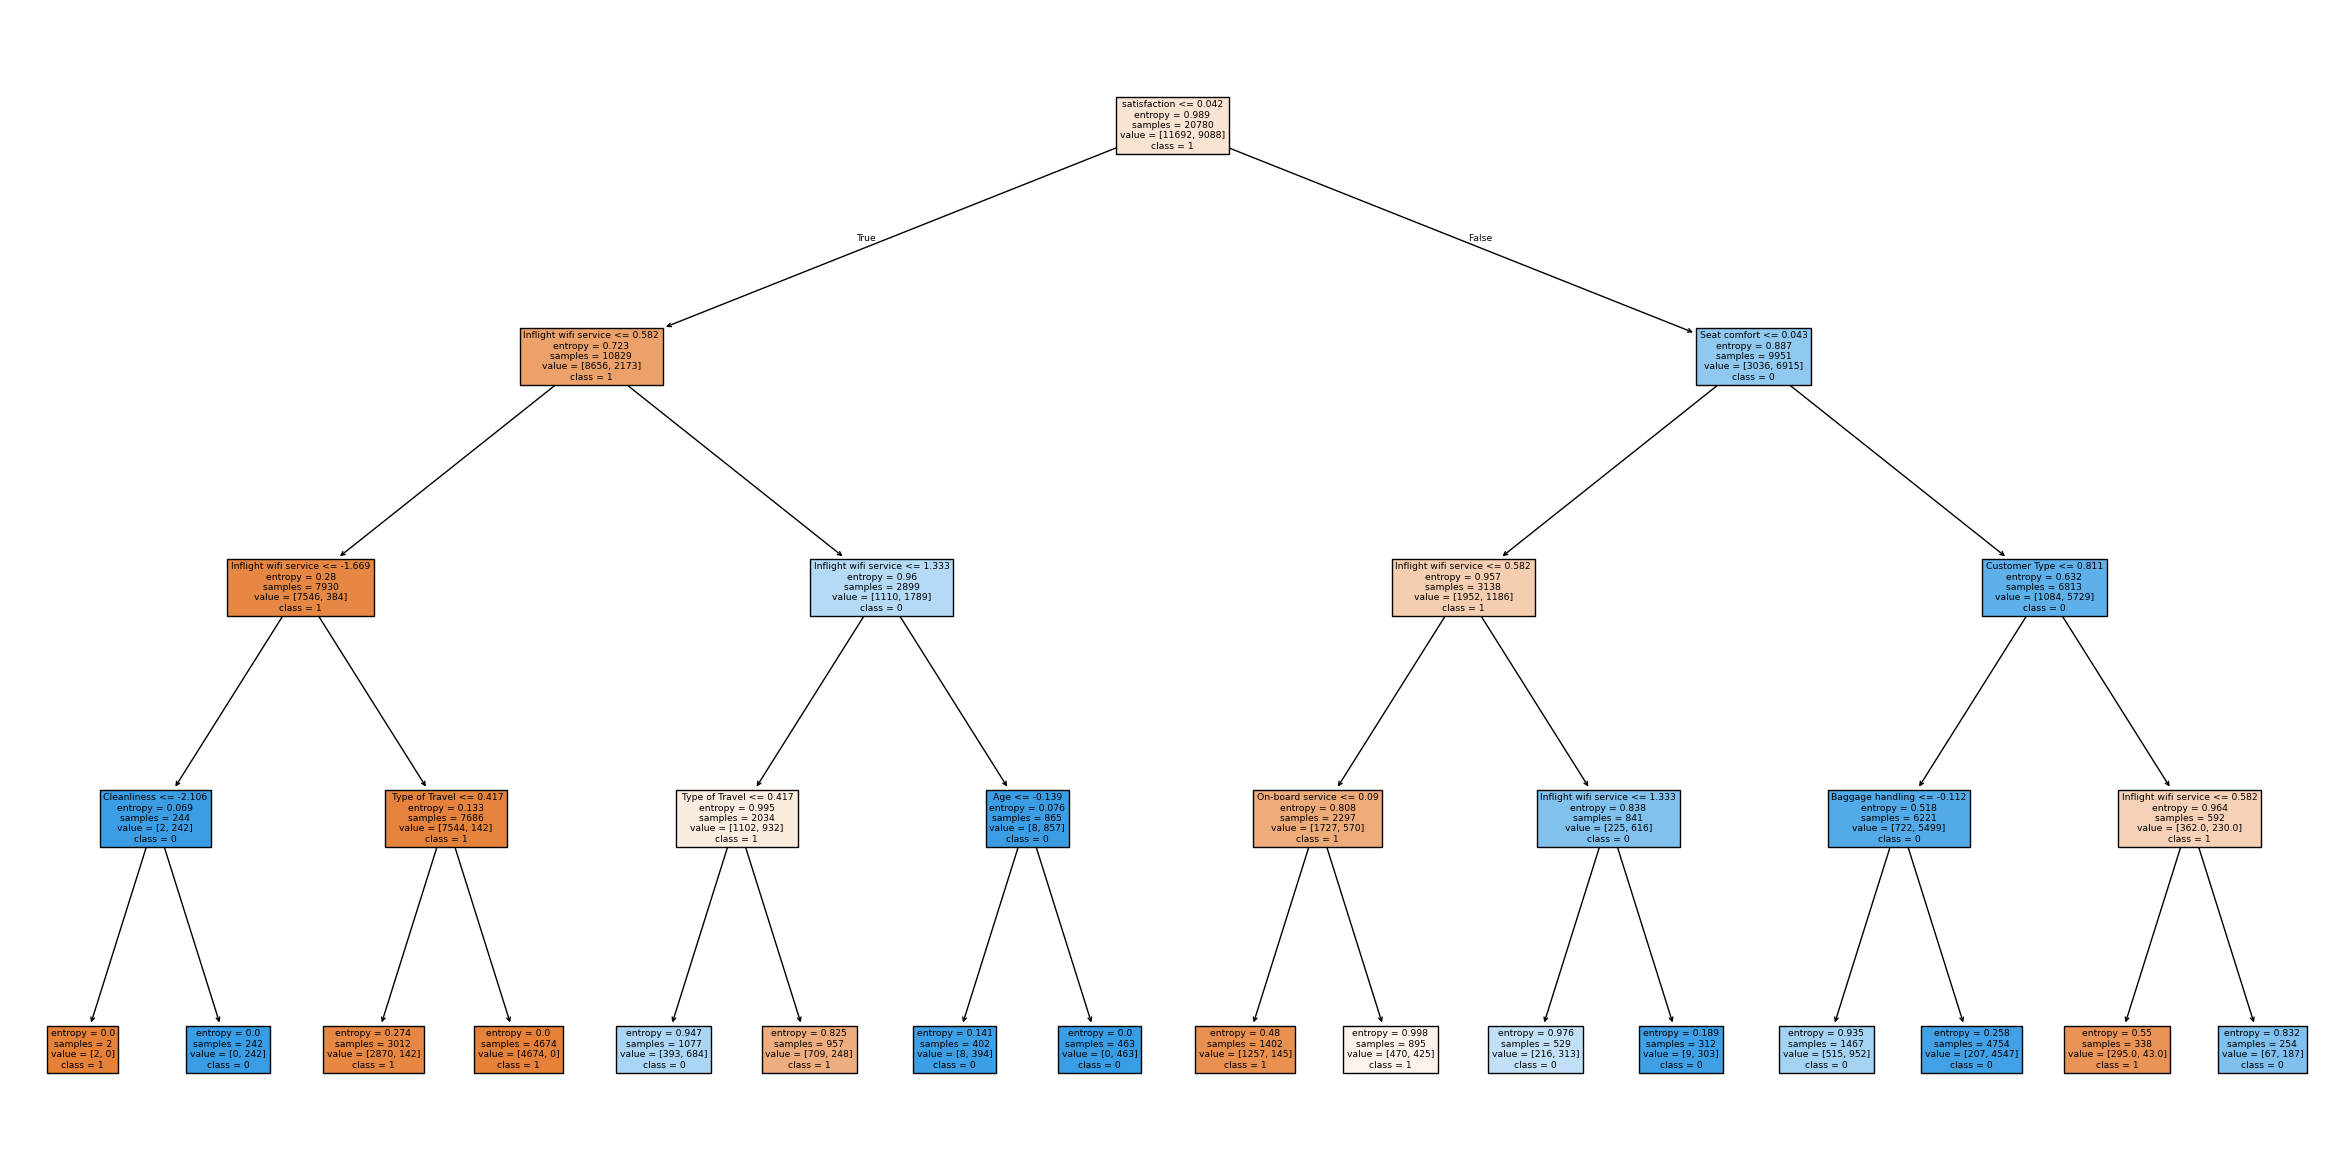

In [306]:
plt.figure(figsize=(30,15))
tree.plot_tree(dt,feature_names=['id','Gender','Customer Type','Age',' Type of Travel','Flight Distance','Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction','Business','Eco','Eco Plus'],class_names=['1','0'],filled=True)

building decision tree model with the balanced data

In [307]:
from sklearn.tree import DecisionTreeClassifier

dt1=DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt1.fit(xres,yres)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [308]:
pre1=dt1.predict(xtest)
pre1

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [309]:
#training score

training_score=dt1.score(xres,yres)
training_score

0.892319534724598

In [310]:
#testing score

testing_score=dt1.score(xtest,ytest)
testing_score

0.7771362586605081

In [311]:
#accuracy score

metrics.accuracy_score(ytest,pre1)

0.7771362586605081

In [312]:
#confusion matrix

metrics.confusion_matrix(ytest,pre1)

array([[1891,  990],
       [ 168, 2147]])

In [313]:
#precision score

metrics.precision_score(ytest,pre1)

0.6844118584635002

In [314]:
#recall score

metrics.recall_score(ytest,pre1)

0.9274298056155508

In [315]:
#classification report

print(metrics.classification_report(ytest,pre1))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      2881
           1       0.68      0.93      0.79      2315

    accuracy                           0.78      5196
   macro avg       0.80      0.79      0.78      5196
weighted avg       0.81      0.78      0.78      5196



plotting decision tree model using this balanced data

[Text(0.5, 0.9, 'satisfaction <= -1.029\nentropy = 1.0\nsamples = 23384\nvalue = [11692, 11692]\nclass = 1'),
 Text(0.25, 0.7, 'Inflight wifi service <= 0.58\nentropy = 0.769\nsamples = 11171\nvalue = [8656, 2515]\nclass = 1'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Inflight wifi service <= -1.669\nentropy = 0.326\nsamples = 8024\nvalue = [7546, 478]\nclass = 1'),
 Text(0.0625, 0.3, 'Ease of Online booking <= 0.185\nentropy = 0.063\nsamples = 271\nvalue = [2, 269]\nclass = 0'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 269\nvalue = [0, 269]\nclass = 0'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.1875, 0.3, ' Type of Travel <= 0.504\nentropy = 0.179\nsamples = 7753\nvalue = [7544, 209]\nclass = 1'),
 Text(0.15625, 0.1, 'entropy = 0.349\nsamples = 3071\nvalue = [2870.0, 201.0]\nclass = 1'),
 Text(0.21875, 0.1, 'entropy = 0.018\nsamples = 4682\nvalue = [4674, 8]\nclass = 1'),
 Text(0.375, 0.5, 'Inflight wifi service <= 1.33\nentropy

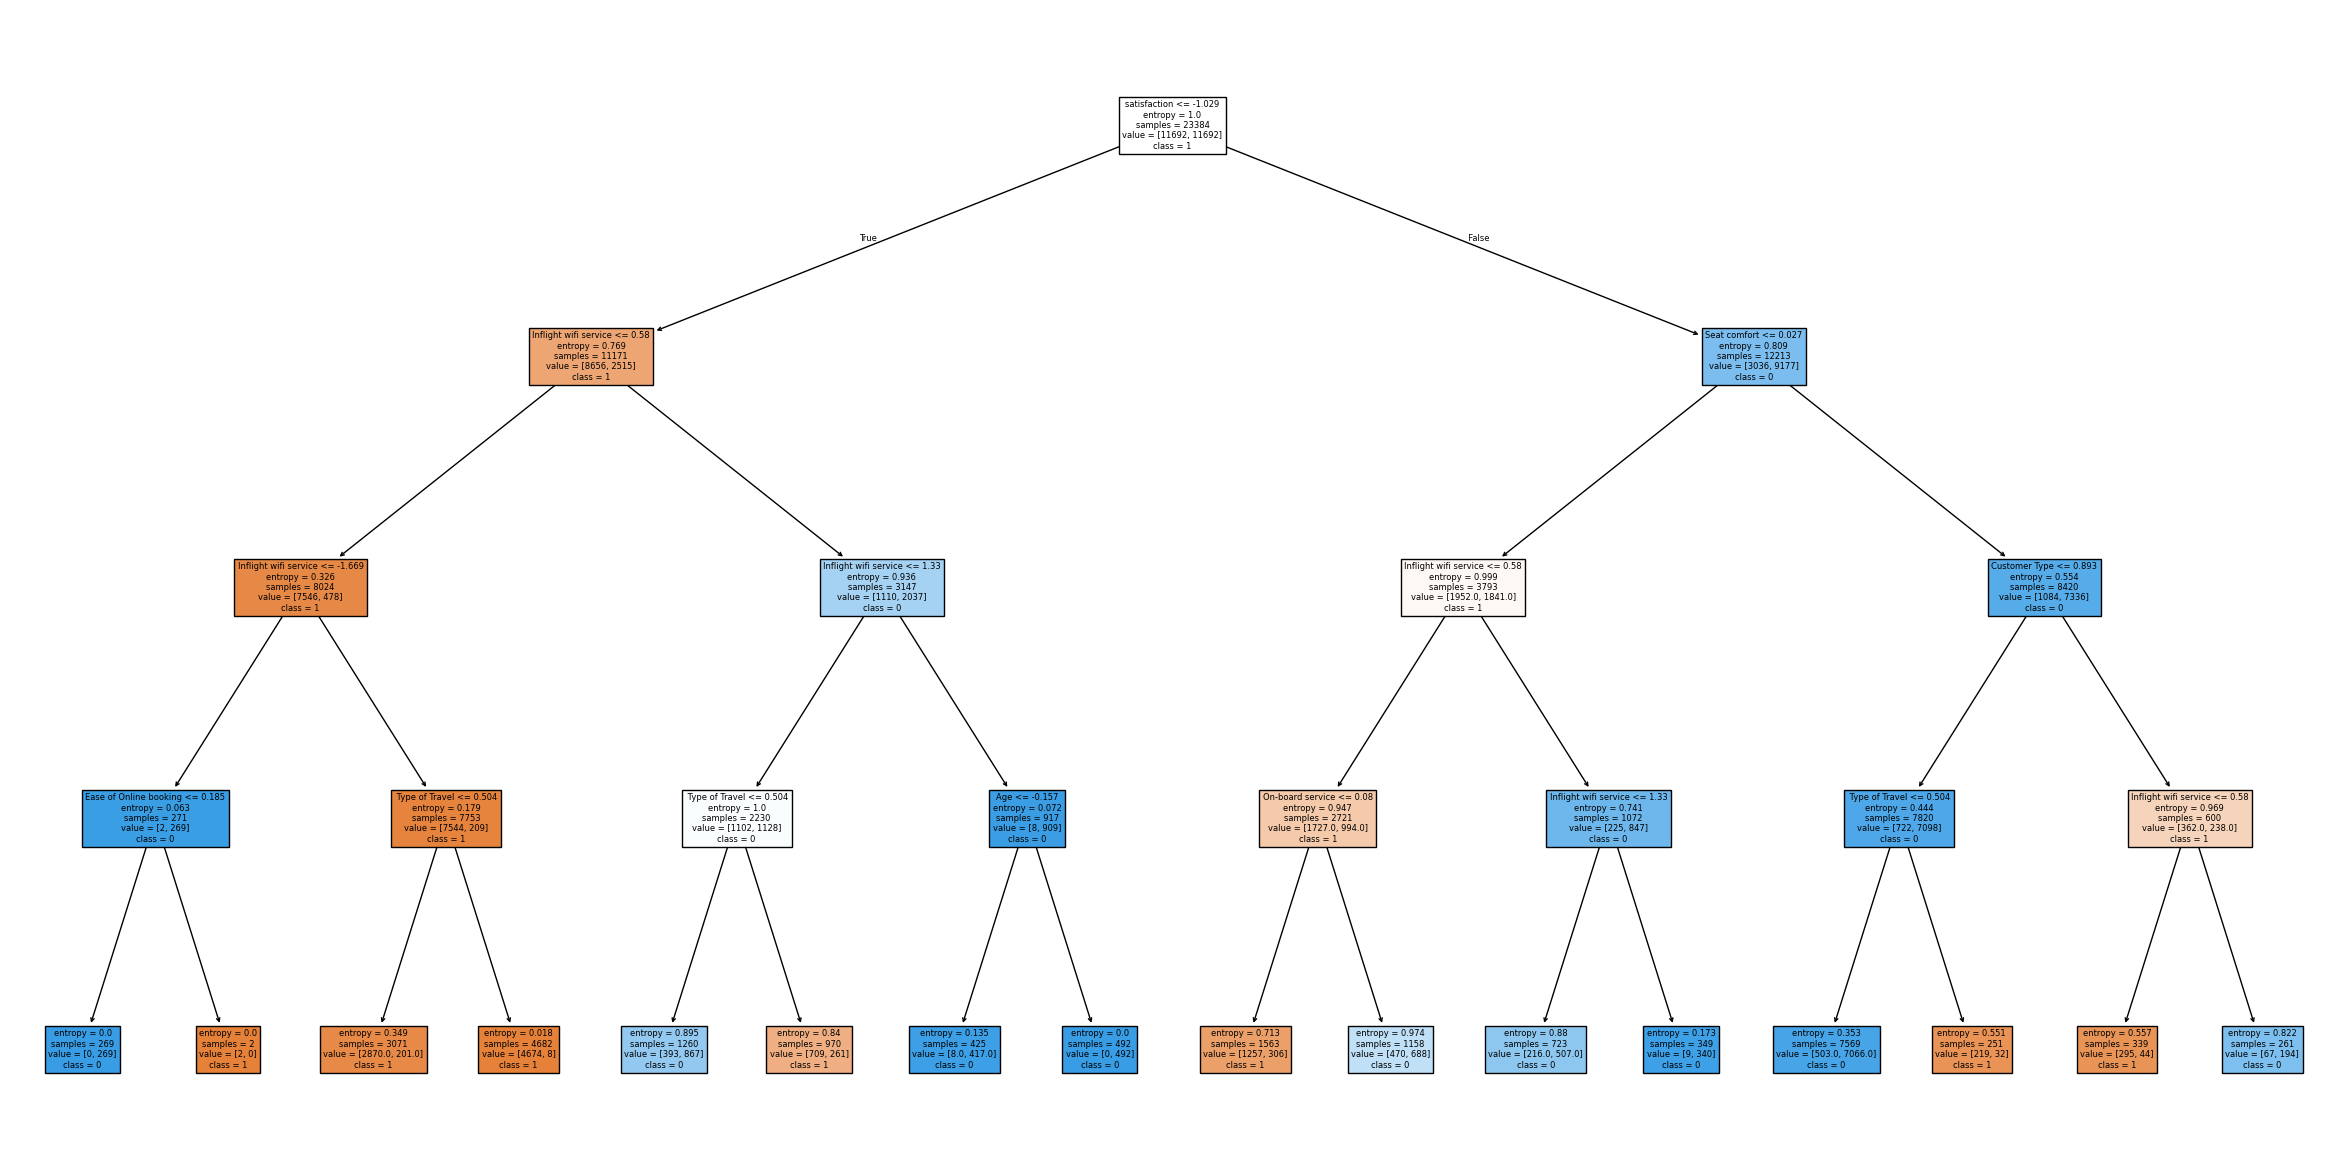

In [316]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
tree.plot_tree(dt1,feature_names=['id','Gender','Customer Type','Age',' Type of Travel','Flight Distance','Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction','Business','Eco','Eco Plus'],class_names=['1','0'],filled=True)

Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.88)

#3)Naive bayes

GaussianNB

In [317]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(xtrain,ytrain)

GaussianNB()

In [318]:
ypred1=nb.predict(xtest)

In [319]:
ypred1

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [320]:
#training score

training_score = nb.score(xtrain,ytrain)
training_score

0.8216073147256978

In [321]:
#testing score

testing_score = nb.score(xtest,ytest)
testing_score

0.8221709006928406

In [322]:
#accuracy score

gn_acc=metrics.accuracy_score(ytest,ypred1)
gn_acc

0.8221709006928406

In [323]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred1)

array([[2432,  449],
       [ 475, 1840]])

In [324]:
#classification report

print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2881
           1       0.80      0.79      0.80      2315

    accuracy                           0.82      5196
   macro avg       0.82      0.82      0.82      5196
weighted avg       0.82      0.82      0.82      5196



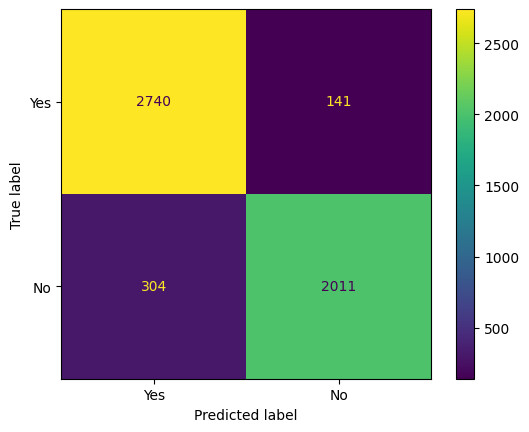

In [325]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cm=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

building GaussianNB model with the balanced data

In [326]:
from sklearn.naive_bayes import GaussianNB

nb1=GaussianNB()

nb1.fit(xres,yres)

GaussianNB()

In [327]:
ypred11=nb1.predict(xtest)
ypred11

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [328]:
#training score

training_score = nb1.score(xres,yres)
training_score

0.8140181320561067

In [329]:
#testing score

testing_score = nb1.score(xtest,ytest)
testing_score

0.815242494226328

In [330]:
#accuracy score

metrics.accuracy_score(ytest,ypred11)

0.815242494226328

In [331]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred11)

array([[2350,  531],
       [ 429, 1886]])

In [332]:
#classification report

print(metrics.classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2881
           1       0.78      0.81      0.80      2315

    accuracy                           0.82      5196
   macro avg       0.81      0.82      0.81      5196
weighted avg       0.82      0.82      0.82      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.82)

BernoulliNB

In [333]:
from sklearn.naive_bayes import BernoulliNB

br=BernoulliNB()

br.fit(xtrain,ytrain)

BernoulliNB()

In [334]:
ypred2=br.predict(xtest)
ypred2

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [335]:
#training score

training_score = br.score(xtrain,ytrain)
training_score

0.8187680461982676

In [336]:
#testing score

testing_score = br.score(xtest,ytest)
testing_score

0.8112009237875288

In [337]:
#accuracy score

bn_acc=metrics.accuracy_score(ytest,ypred2)
bn_acc

0.8112009237875288

In [338]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred2)

array([[2457,  424],
       [ 557, 1758]])

In [339]:
#classification report

print(metrics.classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2881
           1       0.81      0.76      0.78      2315

    accuracy                           0.81      5196
   macro avg       0.81      0.81      0.81      5196
weighted avg       0.81      0.81      0.81      5196



building BernoulliNB model with the balanced data

In [340]:
from sklearn.naive_bayes import BernoulliNB

br1=BernoulliNB()

br1.fit(xres,yres)

BernoulliNB()

In [341]:
ypred22=br1.predict(xtest)
ypred22

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [342]:
#training score

training_score = br1.score(xres,yres)
training_score

0.8044816968867602

In [343]:
#testing score

testing_score = br1.score(xtest,ytest)
testing_score

0.8061970746728252

In [344]:
#accuracy score

metrics.accuracy_score(ytest,ypred22)

0.8061970746728252

In [345]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred22)

array([[2366,  515],
       [ 492, 1823]])

In [346]:
#classification report

print(metrics.classification_report(ytest,ypred22))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2881
           1       0.78      0.79      0.78      2315

    accuracy                           0.81      5196
   macro avg       0.80      0.80      0.80      5196
weighted avg       0.81      0.81      0.81      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.81)

#4)SVM(linear)

In [347]:
from sklearn.svm import SVC

lin=SVC(kernel='linear')

lin.fit(xtrain,ytrain)

SVC(kernel='linear')

In [348]:
y1=lin.predict(xtest)

In [349]:
y1

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [350]:
#training score

training_score=lin.score(xtrain,ytrain)
training_score

0.8570741097208855

In [351]:
#testing score

testing_score=lin.score(xtest,ytest)
testing_score

0.855080831408776

In [352]:
#accuracy score

sl_acc=metrics.accuracy_score(ytest,y1)
sl_acc

0.855080831408776

In [353]:
#confusion matrix

metrics.confusion_matrix(ytest,y1)

array([[2573,  308],
       [ 445, 1870]])

In [354]:
#classification report

print(metrics.classification_report(ytest,y1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2881
           1       0.86      0.81      0.83      2315

    accuracy                           0.86      5196
   macro avg       0.86      0.85      0.85      5196
weighted avg       0.86      0.86      0.85      5196



building SVM model with kernel function 'linear' by using the balanced data

In [355]:
from sklearn.svm import SVC

svc1=SVC(kernel='linear')

svc1.fit(xres,yres)

SVC(kernel='linear')

In [356]:
y11=svc1.predict(xtest)

In [357]:
y11

array([1, 1, 0, ..., 0, 0, 1])

In [358]:
#training score

training_score=svc1.score(xres,yres)
training_score

0.8536178583646938

In [359]:
#testing score

testing_score=svc1.score(xtest,ytest)
testing_score

0.8416089299461124

In [360]:
#accuracy score

metrics.accuracy_score(ytest,y11)

0.8416089299461124

In [361]:
#confusion matrix

metrics.confusion_matrix(ytest,y11)

array([[2408,  473],
       [ 350, 1965]])

In [362]:
#classification report

print(metrics.classification_report(ytest,y11))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2881
           1       0.81      0.85      0.83      2315

    accuracy                           0.84      5196
   macro avg       0.84      0.84      0.84      5196
weighted avg       0.84      0.84      0.84      5196



#SVM(poly)

In [363]:
from sklearn.svm import SVC

pol=SVC(kernel='poly')

pol.fit(xtrain,ytrain)

SVC(kernel='poly')

In [364]:
y2=pol.predict(xtest)

In [365]:
y2

array([1, 0, 0, ..., 0, 0, 1])

evaluation

In [366]:
#training score

training_score=pol.score(xtrain,ytrain)
training_score

0.9243022136669875

In [367]:
#testing score

testing_score=pol.score(xtest,ytest)
testing_score

0.913972286374134

In [368]:
#accuracy score

sp_acc=metrics.accuracy_score(ytest,y2)
sp_acc

0.913972286374134

In [369]:
#confusion matrix

metrics.confusion_matrix(ytest,y2)

array([[2731,  150],
       [ 297, 2018]])

In [370]:
#classification report

print(metrics.classification_report(ytest,y2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2881
           1       0.93      0.87      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



building SVM model with kernel function 'polynomial' by using the balanced data

In [371]:
from sklearn.svm import SVC

pol1=SVC(kernel='poly')

pol1.fit(xres,yres)

SVC(kernel='poly')

In [372]:
y22=pol1.predict(xtest)

In [373]:
y22

array([1, 0, 0, ..., 0, 0, 1])

evaluation

In [374]:
#training score

training_score=pol1.score(xres,yres)
training_score

0.9245638043106398

In [375]:
#testing score

testing_score=pol1.score(xtest,ytest)
testing_score

0.9051193225558122

In [376]:
#accuracy score

metrics.accuracy_score(ytest,y22)

0.9051193225558122

In [377]:
#confusion matrix

metrics.confusion_matrix(ytest,y22)

array([[2602,  279],
       [ 214, 2101]])

In [378]:
#classification report

print(metrics.classification_report(ytest,y22))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2881
           1       0.88      0.91      0.89      2315

    accuracy                           0.91      5196
   macro avg       0.90      0.91      0.90      5196
weighted avg       0.91      0.91      0.91      5196



#SVM(sigmoid)

In [379]:
from sklearn.svm import SVC

sig=SVC(kernel='sigmoid')

sig.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [380]:
y3=sig.predict(xtest)

In [381]:
y3

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [382]:
#training score

training_score=sig.score(xtrain,ytrain)
training_score

0.7615976900866217

In [383]:
#testing score

testing_score=sig.score(xtest,ytest)
testing_score

0.7594303310238645

In [384]:
#accuracy score

ss_acc=metrics.accuracy_score(ytest,y3)
ss_acc

0.7594303310238645

In [385]:
#confusion matrix

metrics.confusion_matrix(ytest,y3)

array([[2268,  613],
       [ 637, 1678]])

In [386]:
#classification report

print(metrics.classification_report(ytest,y3))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2881
           1       0.73      0.72      0.73      2315

    accuracy                           0.76      5196
   macro avg       0.76      0.76      0.76      5196
weighted avg       0.76      0.76      0.76      5196



building SVM model with kernel function 'sigmoid' by using the balanced data

In [387]:
from sklearn.svm import SVC

sig1=SVC(kernel='sigmoid')

sig1.fit(xres,yres)

SVC(kernel='sigmoid')

In [388]:
y33=sig.predict(xtest)
y33

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [389]:
#training score

training_score=sig1.score(xres,yres)
training_score

0.7386674649332877

In [390]:
#testing score

testing_score=sig1.score(xtest,ytest)
testing_score

0.73941493456505

In [391]:
#accuracy score

metrics.accuracy_score(ytest,y33)

0.7594303310238645

In [392]:
#confusion matrix

metrics.confusion_matrix(ytest,y33)

array([[2268,  613],
       [ 637, 1678]])

In [393]:
#classification report

print(metrics.classification_report(ytest,y33))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2881
           1       0.73      0.72      0.73      2315

    accuracy                           0.76      5196
   macro avg       0.76      0.76      0.76      5196
weighted avg       0.76      0.76      0.76      5196



#SVM(radial basis function-rbf)

In [394]:
from sklearn.svm import SVC

rbf=SVC(kernel='rbf')

rbf.fit(xtrain,ytrain)

SVC()

In [395]:
y4=rbf.predict(xtest)

In [396]:
y4

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [397]:
#training score

training_score=rbf.score(xtrain,ytrain)
training_score

0.9505293551491819

In [398]:
#testing score

testing_score=rbf.score(xtest,ytest)
testing_score

0.9466897613548884

In [399]:
#accuracy score

sr_acc=metrics.accuracy_score(ytest,y4)
sr_acc

0.9466897613548884

In [400]:
#confusion matrix

metrics.confusion_matrix(ytest,y4)

array([[2777,  104],
       [ 173, 2142]])

In [401]:
#mean_squared_error

metrics.mean_squared_error(ytest,y4)

0.05331023864511163

In [402]:
#classification report

print(metrics.classification_report(ytest,y4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2881
           1       0.95      0.93      0.94      2315

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.95      5196
weighted avg       0.95      0.95      0.95      5196



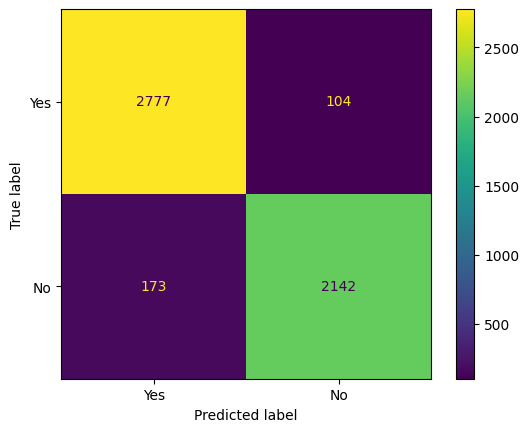

In [403]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cf=confusion_matrix(ytest,y4)
cmd=ConfusionMatrixDisplay(cf,display_labels=labels)
cmd.plot()

building SVM model with kernel function 'rbf' by using the balanced data

In [404]:
from sklearn.svm import SVC

rbf1=SVC(kernel='rbf')

rbf1.fit(xres,yres)

SVC()

In [405]:
y44=rbf.predict(xtest)
y44

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [406]:
#training score

training_score=rbf1.score(xres,yres)
training_score

0.9489394457748889

In [407]:
#testing score

testing_score=rbf1.score(xtest,ytest)
testing_score

0.9445727482678984

In [408]:
#accuracy score

metrics.accuracy_score(ytest,y44)

0.9466897613548884

In [409]:
#confusion matrix

metrics.confusion_matrix(ytest,y44)

array([[2777,  104],
       [ 173, 2142]])

In [410]:
#classification report

print(metrics.classification_report(ytest,y44))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2881
           1       0.95      0.93      0.94      2315

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.95      5196
weighted avg       0.95      0.95      0.95      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.95)

#5)logistic regression

In [411]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

lg.fit(xtrain,ytrain)

LogisticRegression()

In [412]:
yp=lg.predict(xtest)
yp

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [413]:
#training score

training_score=lg.score(xtrain,ytrain)
training_score

0.8552454282964389

In [414]:
#testing score

testing_score=lg.score(xtest,ytest)
testing_score

0.8520015396458814

In [415]:
#accuracy score

log_acc=metrics.accuracy_score(ytest,yp)
log_acc

0.8520015396458814

In [416]:
#confusion matrix

metrics.confusion_matrix(ytest,yp)

array([[2546,  335],
       [ 434, 1881]])

In [417]:
#classification report

print(metrics.classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2881
           1       0.85      0.81      0.83      2315

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



In [418]:
#mean_squared_error

metrics.mean_squared_error(ytest,yp)

0.14799846035411857

building logistic regression with the implementation of balanced data

In [419]:
from sklearn.linear_model import LogisticRegression

lg1=LogisticRegression()

lg1.fit(xres,yres)

LogisticRegression()

In [420]:
yp1=lg1.predict(xtest)
yp1

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [421]:
#training score

training_score=lg1.score(xres,yres)
training_score

0.8546869654464592

In [422]:
#testing score

testing_score=lg1.score(xtest,ytest)
testing_score

0.8402617397998461

In [423]:
#accuracy score

metrics.accuracy_score(ytest,yp1)

0.8402617397998461

In [424]:
#confusion matrix

metrics.confusion_matrix(ytest,yp1)

array([[2382,  499],
       [ 331, 1984]])

In [425]:
#classification report

print(metrics.classification_report(ytest,yp1))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2881
           1       0.80      0.86      0.83      2315

    accuracy                           0.84      5196
   macro avg       0.84      0.84      0.84      5196
weighted avg       0.84      0.84      0.84      5196



In [426]:
#mean_squared_error

metrics.mean_squared_error(ytest,yp1)

0.15973826020015397

Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.85)

#6)ensemble bagging

In [427]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)

rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [428]:
ypr=rfc.predict(xtest)
ypr

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [429]:
#training score

training_score=rfc.score(xtrain,ytrain)
training_score

0.9136669874879692

In [430]:
#testing score

testing_score=rfc.score(xtest,ytest)
testing_score

0.9068514241724404

In [431]:
#accuracy score

ens_acc=metrics.accuracy_score(ytest,ypr)
ens_acc

0.9068514241724404

In [432]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,ypr)
confusion_matrix

array([[2631,  250],
       [ 234, 2081]])

In [433]:
#classification report

print(metrics.classification_report(ytest,ypr))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2881
           1       0.89      0.90      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.91      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



building random forest model with the implementation of balanced data

In [434]:
from sklearn.ensemble import RandomForestClassifier

rfc1=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)

rfc1.fit(xres,yres)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [435]:
ypr1=rfc1.predict(xtest)
ypr1

array([1, 1, 1, ..., 0, 1, 1])

evaluation

In [436]:
#training score

training_score=rfc1.score(xres,yres)
training_score

0.9216985973315087

In [437]:
#testing score

testing_score=rfc1.score(xtest,ytest)
testing_score

0.7061200923787528

In [438]:
#accuracy score

metrics.accuracy_score(ytest,ypr1)

0.7061200923787528

In [439]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,ypr1)
confusion_matrix

array([[1436, 1445],
       [  82, 2233]])

In [440]:
#classification report

print(metrics.classification_report(ytest,ypr1))

              precision    recall  f1-score   support

           0       0.95      0.50      0.65      2881
           1       0.61      0.96      0.75      2315

    accuracy                           0.71      5196
   macro avg       0.78      0.73      0.70      5196
weighted avg       0.80      0.71      0.69      5196



Conclusion:-

from the above two model it is clear that both balanced and unbalanced data has accuracy (accuracy score= 0.92)

#7)adaboost

In [441]:
import sklearn.ensemble as esm

adb=esm.AdaBoostClassifier(n_estimators=10)

adb.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [442]:
pred=adb.predict(xtest)
pred

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [443]:
#training score

training_score=adb.score(xtrain,ytrain)
training_score

0.9026948989412897

In [444]:
#testing score

testing_score=adb.score(xtest,ytest)
testing_score

0.9030023094688222

In [445]:
#accuracy score

ada_acc=metrics.accuracy_score(ytest,pred)
ada_acc

0.9030023094688222

In [446]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,pred)
confusion_matrix

array([[2626,  255],
       [ 249, 2066]])

In [447]:
#classification report

print(metrics.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2881
           1       0.89      0.89      0.89      2315

    accuracy                           0.90      5196
   macro avg       0.90      0.90      0.90      5196
weighted avg       0.90      0.90      0.90      5196



building adaboostclassifier with the implementation of smoted data


In [448]:
import sklearn.ensemble as esm

adb1=esm.AdaBoostClassifier(n_estimators=10)

adb1.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [449]:
pred1=adb1.predict(xtest)
pred1

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [450]:
#training score

training_score=adb1.score(xres,yres)
training_score

0.8931320561067396

In [451]:
#testing score

testing_score=adb1.score(xtest,ytest)
testing_score

0.852963818321786

In [452]:
#accuracy score

metrics.accuracy_score(ytest,pred1)

0.852963818321786

In [453]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,pred1)
confusion_matrix

array([[2219,  662],
       [ 102, 2213]])

In [454]:
#classification report

print(metrics.classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2881
           1       0.77      0.96      0.85      2315

    accuracy                           0.85      5196
   macro avg       0.86      0.86      0.85      5196
weighted avg       0.87      0.85      0.85      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.90)

from all of the models above SVM(rbf) algorithm has the highest accuracy score(=0.95)

#RandomizedSearchCV

In [455]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [456]:
param_dist={'C':[1.0,1,1.5],'gamma':['scale', 'auto'],'degree':[1,2,3],'class_weight':['balanced']}

*C: [1.0, 1, 1.5]*




This is the regularization parameter in some models like Support Vector Machines (SVM) and Logistic Regression. It controls the trade-off between achieving a low training error and a low testing error, which helps prevent overfitting.



*class_weight: ['balanced']*

This parameter is used to adjust weights inversely proportional to class frequencies in the input data, helping to address class imbalance



In [457]:
RBF1=SVC(kernel='linear')

In [458]:
lin1=RandomizedSearchCV(RBF1,param_distributions=param_dist,cv=10)

In [459]:
lin1.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
print(lin1.best_params_)

In [ ]:
print(lin1.score(xtest,ytest))

In [ ]:
lin2=SVC(gamma= 'scale', degree= 2, class_weight= 'balanced', C= 1.5)

In [ ]:
lin2.fit(xtrain,ytrain)

In [ ]:
y_pred=lin2.predict(xtest)

In [ ]:
#accuracy score

print(metrics.accuracy_score(ytest,y_pred))

#GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn1 = KNeighborsClassifier()

In [ ]:
help(knn)

In [ ]:
params = {'n_neighbors':[5,6,2], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

knn2 = GridSearchCV(knn1,params,cv=10,scoring='accuracy')

knn2.fit(xtrain,ytrain)

*weights: ['uniform', 'distance']*

 This parameter determines how the influence of each neighbor is weighted when making predictions.

*algorithm: ['auto', 'ball_tree', 'kd_tree', 'brute']*

 This parameter defines the algorithm used to compute the nearest neighbors.

In [ ]:
knn2.best_params_

In [ ]:
ypred3 = knn2.predict(xtest)
ypred3

In [ ]:
print(knn2.score(xtest,ytest))

In [ ]:
knn3=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, weights= 'distance')

In [ ]:
knn3.fit(xtrain,ytrain)

In [ ]:
ypred4 = knn3.predict(xtest)

In [ ]:
#accuracy score

print(metrics.accuracy_score(ytest,ypred4))

#Visualization

<ipython-input-460-a1e7cbcb4125>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

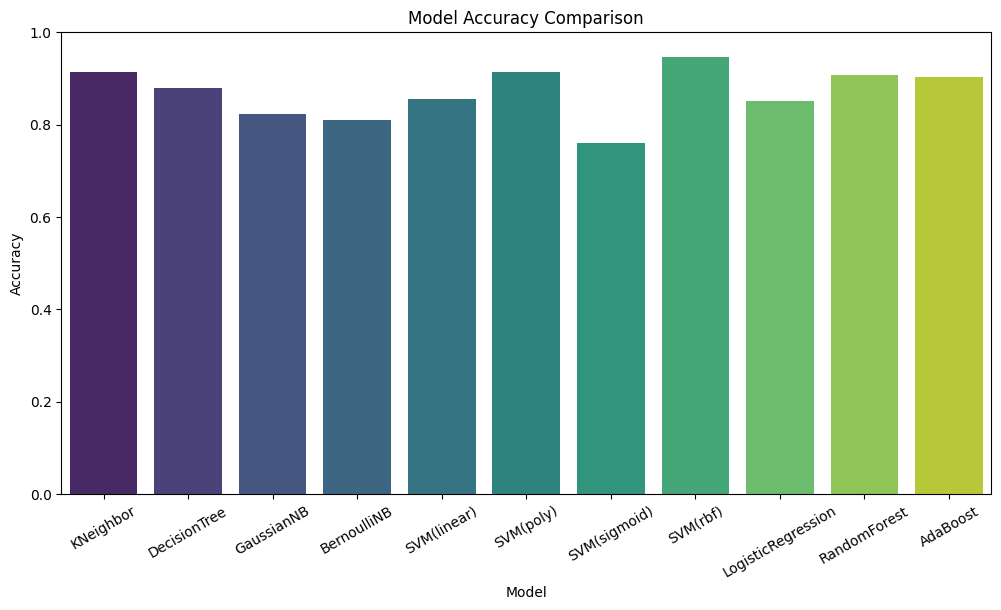

In [460]:
import matplotlib.pyplot as plt

model_names = ['KNeighbor', 'DecisionTree', 'GaussianNB','BernoulliNB','SVM(linear)','SVM(poly)','SVM(sigmoid)','SVM(rbf)','LogisticRegression','RandomForest','AdaBoost']
accuracies = [knn_acc, dt_acc, gn_acc,bn_acc,sl_acc,sp_acc,ss_acc,sr_acc,log_acc,ens_acc,ada_acc]

# Ploting accuracies

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xticks(rotation=30)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#streamlit GUI

using pickle function to save the best model we have built

In [465]:
import pickle

pickle.dump(dt,open('dt.sav','wb'))

In [466]:
import pickle

pickle.dump(sd,open('sdt.sav','wb'))

#Conclusion




After experimenting with multiple models and performing extensive hyperparameter tuning, the **DECISION TREE CLASSIFIER** model with an ACCURACY SCORE of **(0.88)** has emerged as the best-performing model. This conclusion is based on the model's superior performance metrics, such as accuracy, precision, recall, and F1 score, on both the training and validation datasets.